# Bike Sharing Demand

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('SeoulBikeData.csv')

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

## Exploratory Data Analysis

### Exploring Average Rented Bike Count by time of the day (Morning, Afternoon, Evening)

In [8]:
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

In [9]:
df.head(2)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [10]:
df['Time of Day'] = df['Hour'].apply(time_of_day)

In [11]:
df.groupby('Time of Day')['Rented Bike Count'].mean()

Time of Day
Afternoon     848.305023
Evening      1065.401826
Morning       613.988128
Night         290.713242
Name: Rented Bike Count, dtype: float64

Observation: This shows that bikes are rented more in the evening compared to the rest of the day

### Exploring average rental by season

In [14]:
df.groupby('Seasons')['Rented Bike Count'].mean()

Seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64

Observation: This shows that there is increase in bike rental during summer season

### Exploring average rental by time of day for each season

In [17]:
df.groupby(['Seasons', 'Time of Day'])['Rented Bike Count'].mean()

Seasons  Time of Day
Autumn   Afternoon      1039.785714
         Evening        1191.761905
         Morning         720.338828
         Night           326.505495
Spring   Afternoon       986.175725
         Evening        1066.146739
         Morning         624.724638
         Night           243.077899
Summer   Afternoon      1061.836957
         Evening        1717.025362
         Morning         871.429348
         Night           486.001812
Winter   Afternoon       295.485185
         Evening         270.772222
         Morning         232.318519
         Night           103.588889
Name: Rented Bike Count, dtype: float64

### Exploring average bike rental during holiday

In [19]:
df.groupby('Holiday')['Rented Bike Count'].mean()

Holiday
Holiday       499.756944
No Holiday    715.228026
Name: Rented Bike Count, dtype: float64

### Exploring average bike rental by funtioning day

In [21]:
df.groupby('Functioning Day')['Rented Bike Count'].mean()

Functioning Day
No       0.000000
Yes    729.156999
Name: Rented Bike Count, dtype: float64

Observation: Bikes are only rented on functioning day

### Plotting Temp. Against Rented Bike Counts in Each Season

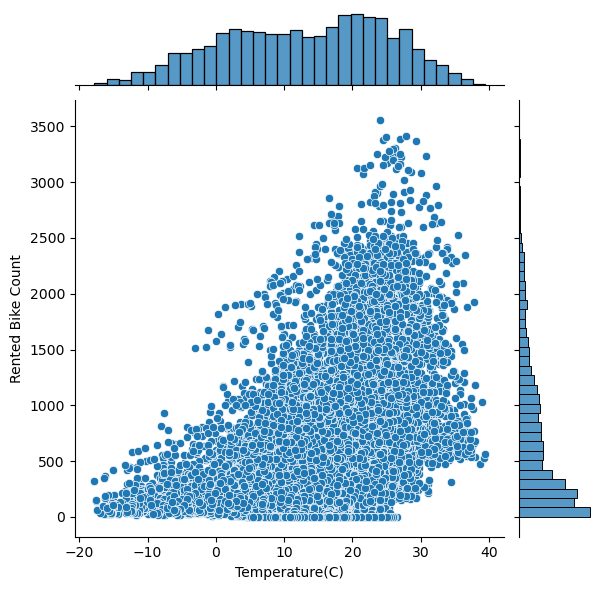

In [24]:
sns.jointplot(x='Temperature(C)', y='Rented Bike Count', data=df)

### Checking for corellation in each column in the datset

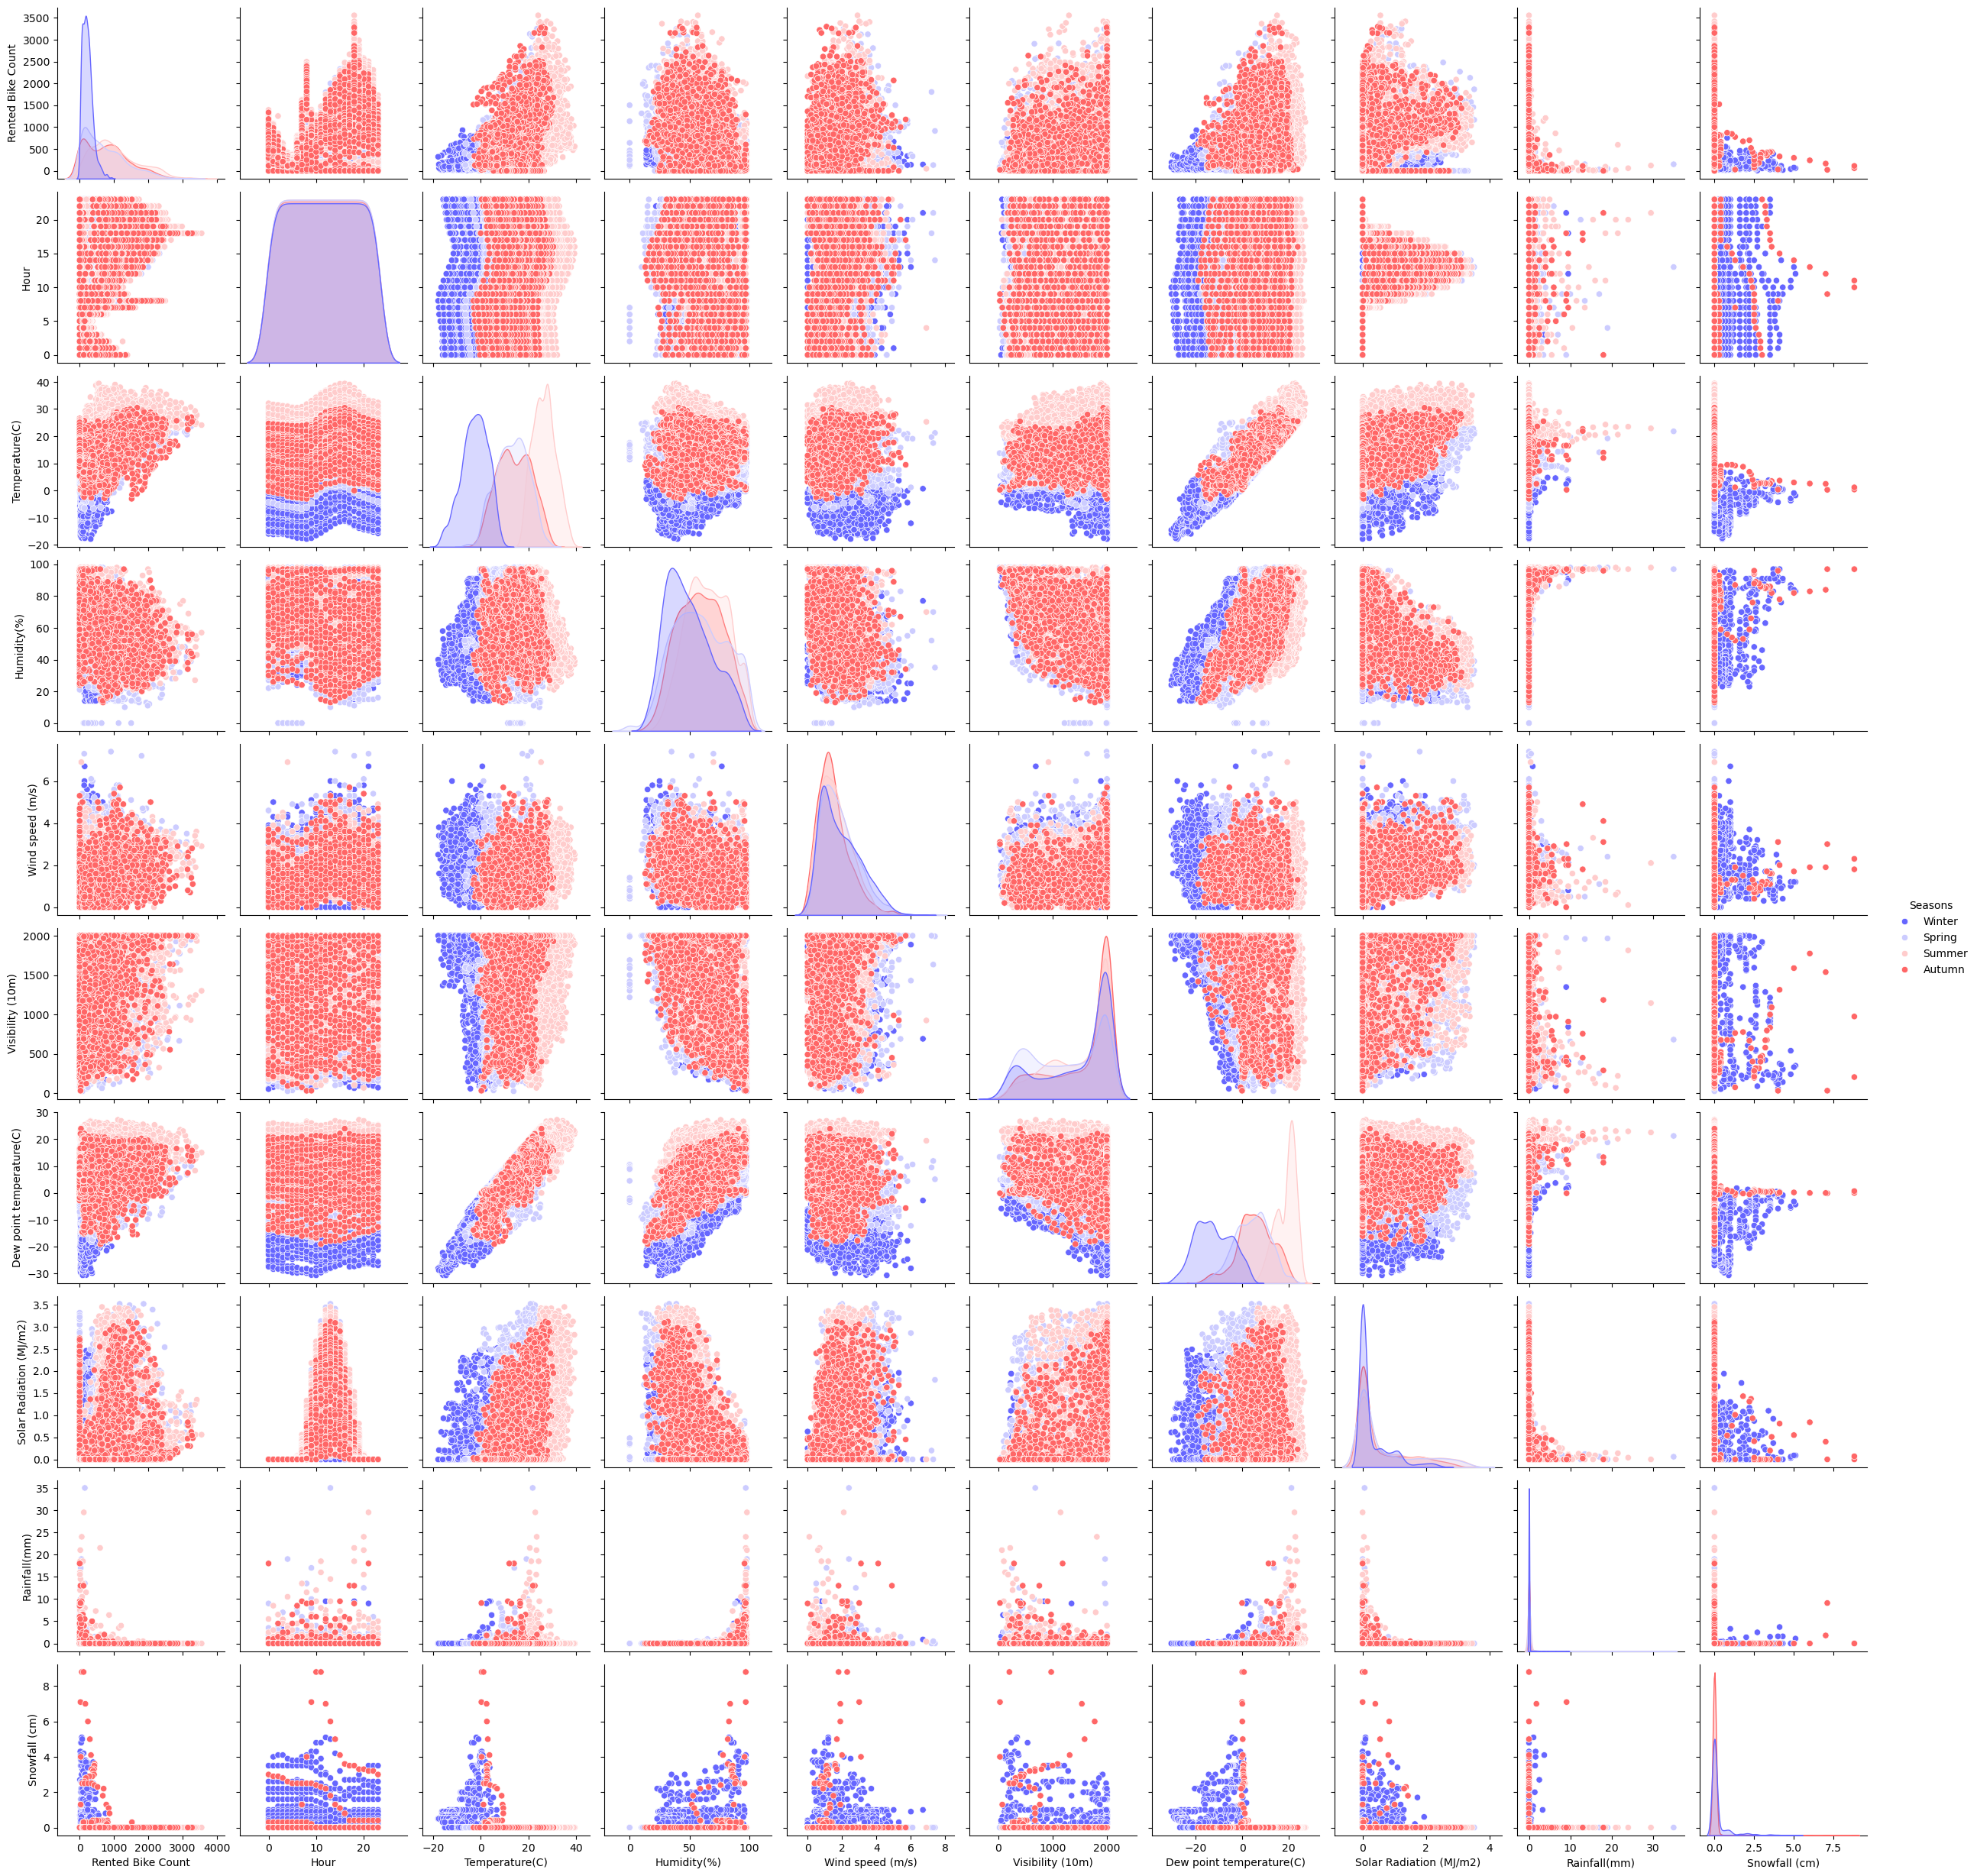

In [26]:
sns.pairplot(df, hue='Seasons', palette='bwr')

## Feature Engineering and Data Preprocessing

### Dropping data that we don't need

In [29]:
new_df = df.drop(['Date', 'Hour'], axis=1)

### Getting our dependent and independent variables

In [109]:
X = new_df.iloc[:, 1:].values
y = new_df.iloc[:, 0].values

In [111]:
X

array([[-5.2, 37, 2.2, ..., 'No Holiday', 'Yes', 'Night'],
       [-5.5, 38, 0.8, ..., 'No Holiday', 'Yes', 'Night'],
       [-6.0, 39, 1.0, ..., 'No Holiday', 'Yes', 'Night'],
       ...,
       [2.6, 39, 0.3, ..., 'No Holiday', 'Yes', 'Evening'],
       [2.1, 41, 1.0, ..., 'No Holiday', 'Yes', 'Evening'],
       [1.9, 43, 1.3, ..., 'No Holiday', 'Yes', 'Evening']], dtype=object)

In [104]:
y

array([254, 204, 173, ..., 694, 712, 584], dtype=int64)

### Encoding non-numerical data

In [113]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8, 9, 10, 11])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Splitting our data into training and test sets

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Feature Scaling

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[:, 15] = scaler.fit_transform(X_train[:, 15].reshape(-1, 1)).flatten()

## Training the Machine Learning Model

### Using Linear Regression

In [119]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

#### Predicting the values of the test set with Linear Regression Model

In [121]:
X_test[:, 15] = scaler.transform(X_test[:, 15].reshape(-1,1)).flatten()
lin_y_pred = lin_reg.predict(X_test)

#### Calculating the model metrics

In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the metrics
mae = mean_absolute_error(y_test, lin_y_pred)
mse = mean_squared_error(y_test, lin_y_pred)
r2 = r2_score(y_test, lin_y_pred)

# Display the results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 308.90491430067317
Mean Squared Error (MSE): 172392.93728216662
R² Score: 0.59380797633525


### Using SVR Model

In [125]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)

SVR()

In [126]:
svr_y_pred = svr_reg.predict(X_test)

In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the metrics
mae = mean_absolute_error(y_test, svr_y_pred)
mse = mean_squared_error(y_test, svr_y_pred)
r2 = r2_score(y_test, svr_y_pred)

# Display the results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 382.3728928843462
Mean Squared Error (MSE): 318721.7484543695
R² Score: 0.2490282140807858


### Using Decision Tree Regression Model

In [210]:
from sklearn.tree import DecisionTreeRegressor

#### Get the best max_depth parameter for the Decision Tree Class

In [200]:
def get_best_depth(max_n):
    best = 0
    best_r2 = 0
    
    for n in range(1, max_n):
        reg = DecisionTreeRegressor(max_depth=n)
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2:
            best_r2 = r2
            best = n
    return best

In [202]:
get_best_depth(20)

9

In [215]:
dt_reg = DecisionTreeRegressor(max_depth=9)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [217]:
dt_y_pred = dt_reg.predict(X_test)

In [219]:
# Calculate the metrics
mae = mean_absolute_error(y_test, dt_y_pred)
mse = mean_squared_error(y_test, dt_y_pred)
r2 = r2_score(y_test, dt_y_pred)

# Display the results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 206.1306214455517
Mean Squared Error (MSE): 90064.70918625117
R² Score: 0.7877896446229588


### Using Random Forest Regression Model

In [230]:
from sklearn.ensemble import RandomForestRegressor

In [232]:
def get_best_estimator(max_n):
    best = 0
    best_r2 = 0
    
    for n in range(1, max_n):
        reg = RandomForestRegressor(max_depth=n)
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2:
            best_r2 = r2
            best = n
    return best

In [234]:
get_best_estimator(20)

18

In [236]:
rf_reg = RandomForestRegressor(n_estimators=18)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=18)

In [242]:
rf_y_pred = rf_reg.predict(X_test)

In [244]:
# Calculate the metrics
mae = mean_absolute_error(y_test, rf_y_pred)
mse = mean_squared_error(y_test, rf_y_pred)
r2 = r2_score(y_test, rf_y_pred)

# Display the results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 178.5990296803653
Mean Squared Error (MSE): 71217.5263173657
R² Score: 0.8321973533759097
